In [2]:
import pandas as pd
import matplotlib.pyplot as plt

ride_data = pd.read_csv("raw_data/ride_data.csv")
city_data = pd.read_csv("raw_data/city_data.csv")

ride_df = pd.DataFrame({
    "Average Fare ($) Per City": round(ride_data.groupby(["city"]).mean()["fare"],2),
    "Total Number of Rides Per City": ride_data.groupby(["city"]).count()["ride_id"]
})

ride_df_reset = ride_df.reset_index()
city_df_reset = city_data.reset_index()

In [3]:
ride_df_reset.head()

,city,Average Fare ($) Per City,Total Number of Rides Per City
0,Alvarezhaven,23.93,31
1,Alyssaberg,20.61,26
2,Anitamouth,37.32,9
3,Antoniomouth,23.62,22
4,Aprilchester,21.98,19


In [4]:
city_data.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [5]:
merged_df = pd.merge(ride_df_reset,city_df_reset,on="city",how="left")
merged_df.head()

,city,Average Fare ($) Per City,Total Number of Rides Per City,index,driver_count,type
0,Alvarezhaven,23.93,31,65,21,Urban
1,Alyssaberg,20.61,26,18,67,Urban
2,Anitamouth,37.32,9,94,16,Suburban
3,Antoniomouth,23.62,22,53,21,Urban
4,Aprilchester,21.98,19,43,49,Urban


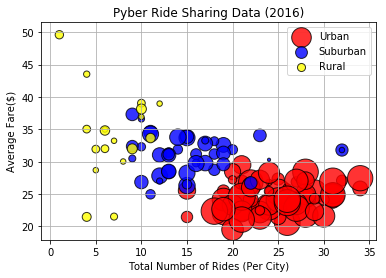

In [6]:
# x-axis = Total Number of Rides (Per City)
# y-axis = Average Fare ($)

# urban - red
urban_x = merged_df.loc[merged_df["type"] == "Urban"]["Total Number of Rides Per City"]
urban_y = merged_df.loc[merged_df["type"] == "Urban"]["Average Fare ($) Per City"]
urban_size = merged_df.loc[merged_df["type"] == "Urban"]["driver_count"]

# # suburban - blue
suburban_x = merged_df.loc[merged_df["type"] == "Suburban"]["Total Number of Rides Per City"]
suburban_y = merged_df.loc[merged_df["type"] == "Suburban"]["Average Fare ($) Per City"]
suburban_size = merged_df.loc[merged_df["type"] == "Suburban"]["driver_count"]


# # rural - yellow
rural_x = merged_df.loc[merged_df["type"] == "Rural"]["Total Number of Rides Per City"]
rural_y = merged_df.loc[merged_df["type"] == "Rural"]["Average Fare ($) Per City"]
rural_size = merged_df.loc[merged_df["type"] == "Rural"]["driver_count"]


# Graph

# plt.figure(figsize=(10,10))

plt.scatter(urban_x,urban_y,label="Urban",s=10*urban_size,c="red",edgecolor="black",alpha=.8)
plt.scatter(suburban_x,suburban_y,label="Suburban",s=10*suburban_size,c="blue", edgecolor="black",alpha=.8)
plt.scatter(rural_x,rural_y,label="Rural",s=10*rural_size,c="yellow",edgecolor="black",alpha=.8)

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare($)")
plt.legend(loc="best")
plt.grid()



plt.show()

In [14]:
pie_data.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [15]:
fares_by_city_pct

type
Rural       0.065798
Suburban    0.314458
Urban       0.619745
Name: fare, dtype: float64

In [19]:
pie_data = pd.merge(ride_data,city_data,on="city",how="left")
# % of Total Fares by City Type
fares_by_city_pct = pie_data.groupby(["type"]).sum()["fare"]/pie_data.sum()["fare"]

# % of Total Rides by City Type
rides_by_city_pct = pie_data.groupby(["type"]).count()["driver_count"]/len(pie_data)

# % of Total Drivers by City Type
drivers_by_city_pct = pie_data.groupby(["type"]).sum()["driver_count"]/pie_data.sum()["driver_count"]
drivers_by_city_pct

type
Rural       0.009699
Suburban    0.129806
Urban       0.860495
Name: driver_count, dtype: float64

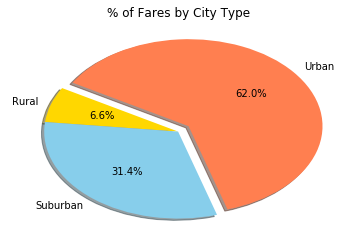

In [22]:
# percet_by_type = merged_df.groupby("type").sum()["fare"]/merged_df["fare"].sum()

plt.pie(fares_by_city_pct,
       labels= ["Rural","Suburban","Urban"],
       colors= ["gold","skyblue","coral"],
       autopct= "%1.1f%%",
       explode= [0,0,0.1],
       shadow= True,
       startangle= 150,)

plt.title("% of Fares by City Type")

plt.show()

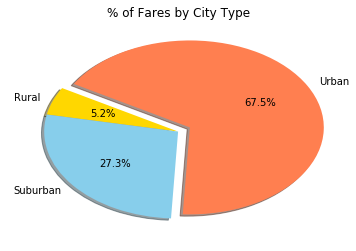

In [23]:
plt.pie(rides_by_city_pct,
       labels= ["Rural","Suburban","Urban"],
       colors= ["gold","skyblue","coral"],
       autopct= "%1.1f%%",
       explode= [0,0,0.1],
       shadow= True,
       startangle= 150,)

plt.title("% of Fares by City Type")

plt.show()

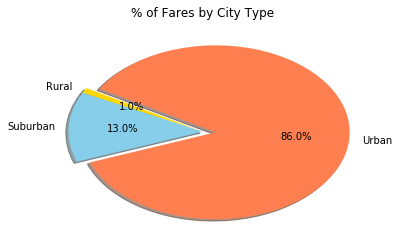

In [24]:
plt.pie(drivers_by_city_pct,
       labels= ["Rural","Suburban","Urban"],
       colors= ["gold","skyblue","coral"],
       autopct= "%1.1f%%",
       explode= [0,0,0.1],
       shadow= True,
       startangle= 150,)

plt.title("% of Fares by City Type")

plt.show()

## Observed Trend:

1. Although urban rides are higher in volume they are amongst the cheaper fairs.
2. Urban fairs tend to be cheaper but own most of the marketshare by volume.
3. There appears to be a negative relationship between price and volume.